In [1]:
#Import Libraries
import numpy as np 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn import svm
import seaborn as sn
import time
import pickle
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve, confusion_matrix, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
#Load input csv file with pandas
Input = pd.read_csv('Project_Data_EE4C12_SET_PV.csv') 

In [3]:
Input

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [4]:
Input.shape

(12000, 8)

In [5]:
y_bc=Input.iloc[:,6]

In [6]:
y_mc=Input.iloc[:,7]

In [7]:
X=Input.iloc[:,:6]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.3853533 , -1.2732594 , -1.24724005, -0.30171937,  1.82622073,
        -0.82501374],
       [-0.90899516, -1.43567466, -0.49320436, -0.82615406, -0.58991658,
        -0.07386031],
       [-1.22390574, -1.16990423, -0.86759795, -0.08806079, -1.19167984,
        -0.79149155],
       ...,
       [-0.94171314, -0.93366384,  0.72095055, -1.16930269, -1.08762524,
         2.14835957],
       [ 0.45698057, -0.416888  ,  0.98162646, -0.62544449, -0.31847992,
         0.51733249],
       [-1.1093928 ,  0.08512283, -0.50894989, -0.35998989, -1.29912015,
         3.73780238]])

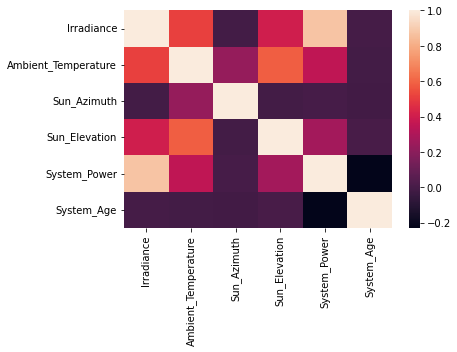

In [8]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix)
plt.show()

### BICLASSIFICATION

In [9]:
#Train test split
Shuffle_state = 4720
Test_ratio = 0.25
X_train_2c, X_test_2c, y_train_2c, y_test_2c = train_test_split(X_scaled,y_bc,test_size=Test_ratio,random_state=Shuffle_state)

In [16]:
#Logistic regression
clf_lr = LogisticRegression().fit(X_train_2c, y_train_2c)
y_prediction = clf_lr.predict(X_test_2c)
print(sum(abs(y_prediction-y_test_2c))/len(y_test_2c))

0.32


In [11]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test_2c,y_prediction)
F1_LR = f1_score(y_test_2c,y_prediction)
Precision_LR = precision_score(y_test_2c,y_prediction)
Recall_LR = recall_score(y_test_2c,y_prediction)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))


Accuracy: 0.68
F1 score: 0.6872964169381107
Recall score: 0.694078947368421
Precision score: 0.6806451612903226


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


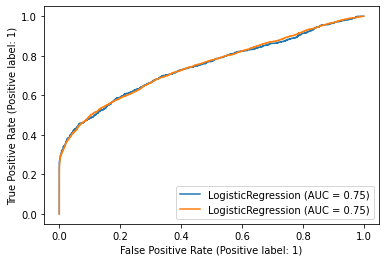

In [12]:
#ROC curve
ax = plt.gca()
test_disp = plot_roc_curve(clf_lr,X_test_2c,y_test_2c,ax=ax)
train_disp = plot_roc_curve(clf_lr,X_train_2c,y_train_2c,ax=ax)
plt.show()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


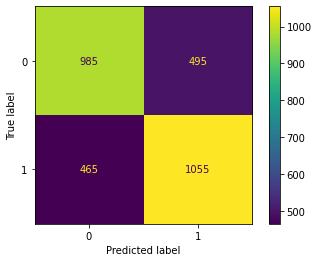

In [17]:
#Confusion Matrix
plot_confusion_matrix(clf_lr, X_test_2c, y_test_2c)

In [18]:
clf_svmlin = svm.SVC(kernel='linear',C=1.0, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c)
y_prediction_svmlin = clf_svmlin.predict(X_test_2c)

In [19]:
#Performance metrics
Accuracy_svmlin = accuracy_score(y_test_2c,y_prediction_svmlin)
F1_svmlin = f1_score(y_test_2c,y_prediction_svmlin)
Precision_svmlin = precision_score(y_test_2c,y_prediction_svmlin)
Recall_svmlin = recall_score(y_test_2c,y_prediction_svmlin)
print("Accuracy: " + str(Accuracy_svmlin))
print("F1 score: " + str(F1_svmlin))
print("Recall score: " + str(Recall_svmlin))
print("Precision score: " + str(Precision_svmlin))

Accuracy: 0.682
F1 score: 0.6794354838709677
Recall score: 0.6651315789473684
Precision score: 0.6943681318681318


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


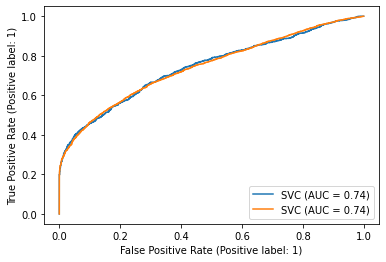

In [20]:
ax = plt.gca()
test_disp = plot_roc_curve(clf_svmlin,X_test_2c,y_test_2c,ax=ax)
train_disp = plot_roc_curve(clf_svmlin,X_train_2c,y_train_2c,ax=ax)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


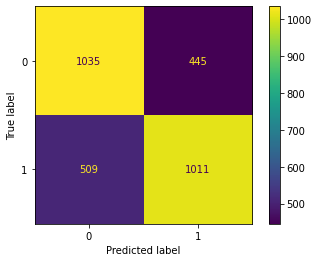

In [21]:
plot_confusion_matrix(clf_svmlin, X_test_2c, y_test_2c)

In [26]:
#Polynomial SVM with 2nd and 3rd degree. 
class_weight={0:1,1:1}
clf_svmpoly1 = svm.SVC(kernel='poly',degree=3,C=1, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train_2c, y_train_2c)
y_prediction_svmpoly1 = clf_svmpoly1.predict(X_test_2c)

In [27]:
#Performance metrics polynomial 3rd 
Accuracy_svmpoly = accuracy_score(y_test_2c,y_prediction_svmpoly1)
F1_svmpoly = f1_score(y_test_2c,y_prediction_svmpoly1)
Precision_svmpoly = precision_score(y_test_2c,y_prediction_svmpoly1)
Recall_svmpoly = recall_score(y_test_2c,y_prediction_svmpoly1)
print("Accuracy: " + str(Accuracy_svmpoly))
print("F1 score: " + str(F1_svmpoly))
print("Recall score: " + str(Precision_svmpoly))
print("Precision score: " + str(Recall_svmpoly))

Accuracy: 0.688
F1 score: 0.6608695652173913
Recall score: 0.7354838709677419
Precision score: 0.6


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


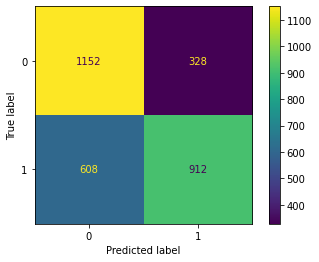

In [89]:
#Confusion matrix poly 3rd
plot_confusion_matrix(clf_svmpoly1, X_test_2c, y_test_2c)

In [53]:
class_weight={0:1,1:1.1}
clf_svmgauss = svm.SVC(C=1000, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train_2c, y_train_2c)
y_prediction_svmguass = clf_svmgauss.predict(X_test_2c)

In [54]:
#Performance metrics polynomial 3rd 
Accuracy_svmG = accuracy_score(y_test_2c,y_prediction_svmguass)
F1_svmG = f1_score(y_test_2c,y_prediction_svmguass)
Precision_svmG = precision_score(y_test_2c,y_prediction_svmguass)
Recall_svmG = recall_score(y_test_2c,y_prediction_svmguass)
print("Accuracy: " + str(Accuracy_svmG))
print("F1 score: " + str(F1_svmG))
print("Recall score: " + str(Precision_svmG))
print("Precision score: " + str(Recall_svmG))

Accuracy: 0.813
F1 score: 0.805680637339799
Recall score: 0.8507681053401609
Precision score: 0.7651315789473684


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


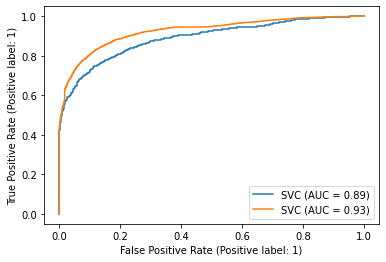

In [55]:
ax = plt.gca()
test_disp = plot_roc_curve(clf_svmgauss,X_test_2c,y_test_2c,ax=ax)
train_disp = plot_roc_curve(clf_svmgauss,X_train_2c,y_train_2c,ax=ax)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


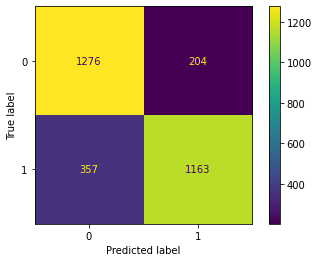

In [56]:
#Confusion matrix poly 3rd
plot_confusion_matrix(clf_svmgauss, X_test_2c, y_test_2c)

### MULTICLASSIFICATION

In [57]:
Shuffle_state = 4720
Test_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_mc,test_size=Test_ratio,random_state=Shuffle_state)

In [38]:
class_weight={0:1,1:1.5,2:1,3:1}
clf_lr_mult = LogisticRegression(multi_class='multinomial',class_weight=class_weight).fit(X_train, y_train)
y_prediction_lrmult = clf_lr_mult.predict(X_test)

In [36]:
#Accuracy of Mult LR
Accuracy_lrmult = accuracy_score(y_test,y_prediction_lrmult)
print("Accuracy: " + str(Accuracy_lrmult))

Accuracy: 0.6163333333333333


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


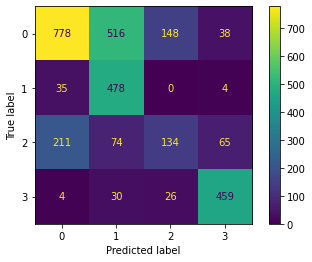

In [37]:
#Confusion matrix mult LR
plot_confusion_matrix(clf_lr_mult, X_test, y_test)

In [51]:
class_weight={0:0.8,1:1.5,2:1.8,3:1}
clf_lr_ovr = LogisticRegression(multi_class='ovr',class_weight=class_weight).fit(X_train, y_train)
y_prediction_lrovr = clf_lr_ovr.predict(X_test)

In [52]:
#Accuracy of OVR LR
Accuracy_lrovr = accuracy_score(y_test,y_prediction_lrovr)
print("Accuracy: " + str(Accuracy_lrovr))

Accuracy: 0.6323333333333333


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


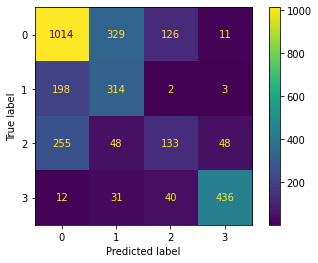

In [53]:
#Confusion matrix OVR LR
plot_confusion_matrix(clf_lr_ovr, X_test, y_test)

In [63]:
#OVR SVM
class_weight={0:0.8,1:1.5,2:1.8,3:1}
clf_svmlin_mc_ovr = svm.SVC(kernel='linear',C=1, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train, y_train)
y_prediction_svmovr = clf_svmlin_mc_ovr.predict(X_test)

In [64]:
#Accuracy of SVM
Accuracy_svmovr = accuracy_score(y_test,y_prediction_svmovr)
print("Accuracy: " + str(Accuracy_svmovr))

Accuracy: 0.6113333333333333


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


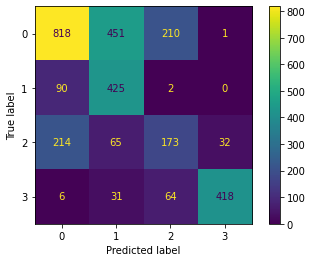

In [65]:
#Confusion matrix SVM OVR
plot_confusion_matrix(clf_svmlin_mc_ovr, X_test, y_test)

In [70]:
#OVR SVM
class_weight={0:1,1:1.1,2:1.1,3:1}
clf_svmG_mc_ovr = svm.SVC(C=1000, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train, y_train)
y_prediction_svmovr = clf_svmG_mc_ovr.predict(X_test)

In [71]:
#Accuracy of SVM
Accuracy_svmovr = accuracy_score(y_test,y_prediction_svmovr)
print("Accuracy: " + str(Accuracy_svmovr))

Accuracy: 0.782


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


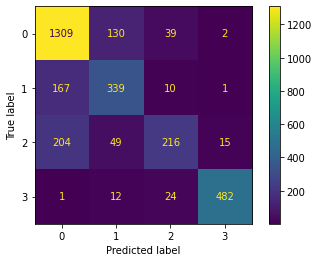

In [72]:
#Confusion matrix SVM OVR
plot_confusion_matrix(clf_svmG_mc_ovr, X_test, y_test)

### PCA CLASSIFICATION


In [40]:
from sklearn.decomposition import PCA

In [44]:
N = 3#number of principal components 
pca = PCA(n_components=N) # Initialize PCA
features = pca.fit_transform(X_train) # feature extraction
print(features.shape)

(9000, 3)


In [49]:
#OVR SVM
class_weight={0:1,1:1.5,2:1,3:1}
clf_svmlin_mc_ovr = svm.SVC(kernel='linear',C=1, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(features, y_train)
y_prediction_svmovr = clf_svmlin_mc_ovr.predict(pca.fit_transform(X_test))

In [50]:
#Accuracy of SVM
Accuracy_svmovr = accuracy_score(y_test,y_prediction_svmovr)
print("Accuracy: " + str(Accuracy_svmovr))

Accuracy: 0.559


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


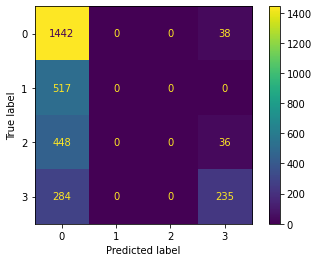

In [51]:
#Confusion matrix SVM OVR
plot_confusion_matrix(clf_svmlin_mc_ovr, pca.fit_transform(X_test), y_test)

### DEEP NEURAL NETWORK prova 1

In [10]:
from keras import models, layers, utils, backend as K

In [11]:
# DeepNN
### layer input
n_features=X.shape[1]
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=4, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [93]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

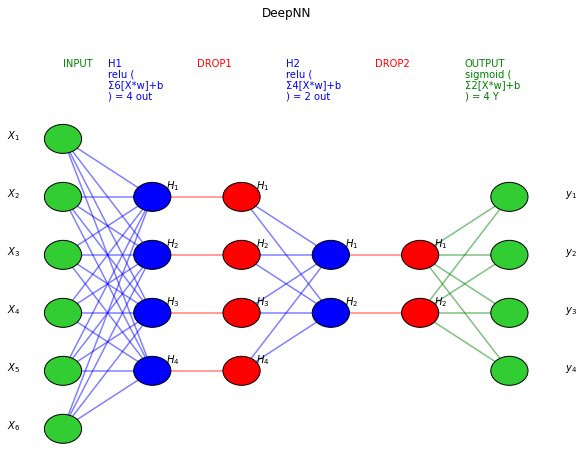

In [13]:
visualize_nn(model, description=True, figsize=(10,8))

In [14]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])

In [70]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [68]:
training = model.fit(x=X_train, y=dummy_y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)


In [120]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error', 
              metrics=[R2])

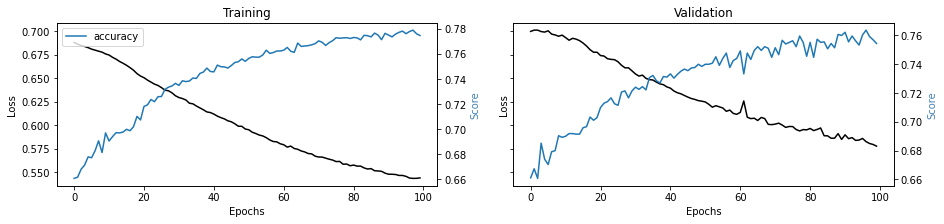

In [51]:
# train/validation
training = model.fit(x=X_train, y=dummy_y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)    
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')    
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)    
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

In [109]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

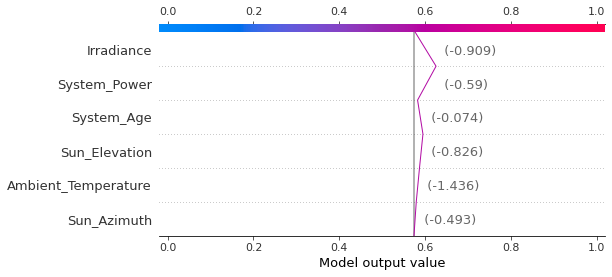

In [119]:
i = 1
explainer_shap(model, 
               X_names=np.array(X.columns), 
               X_instance=X_scaled[i], 
               X_train=X_scaled, 
               task="classification", #task="regression"
               top=10)

### DEEP NEURAL NETWORK prova 2

In [111]:
...
# define baseline model
def baseline_model(layers,nodes):
	# create model 1 hidden layer with 8 nodes
    #nodes=8
    input_node=6
    output_node=4
    model = Sequential()
    model.add(Dense(nodes[0], input_dim=input_node, activation='relu'))
    for i in range(1,layers):
        model.add(Dense(nodes[i], activation='relu'))
    model.add(Dense(output_node, activation='softmax'))
	# Compile mode
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

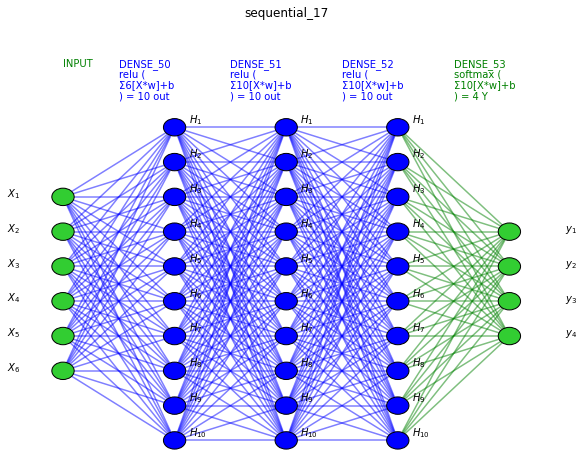

In [122]:
layers=3
nodes=[10,10,10]
model=baseline_model(layers,nodes)
visualize_nn(model, description=True, figsize=(10,8))

In [100]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [101]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)
print(dummy_y_test)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [124]:
# fit the keras model on the dataset
layers=3
nodes=[10,10,10]
model=baseline_model(layers,nodes)
model.fit(X_train, dummy_y, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
900/900 [==============================] - 3s 2ms/step - loss: 1.1981 - accuracy: 0.5013
Epoch 2/30
900/900 [==============================] - 2s 2ms/step - loss: 0.9307 - accuracy: 0.5984
Epoch 3/30
900/900 [==============================] - 2s 2ms/step - loss: 0.7884 - accuracy: 0.6392
Epoch 4/30
900/900 [==============================] - 2s 2ms/step - loss: 0.7509 - accuracy: 0.6563
Epoch 5/30
900/900 [==============================] - 2s 2ms/step - loss: 0.7324 - accuracy: 0.6683
Epoch 6/30
900/900 [==============================] - 2s 2ms/step - loss: 0.7181 - accuracy: 0.6807
Epoch 7/30
900/900 [==============================] - 2s 2ms/step - loss: 0.7020 - accuracy: 0.6917
Epoch 8/30
900/900 [==============================] - 2s 2ms/step - loss: 0.6889 - accuracy: 0.7001
Epoch 9/30
900/900 [==============================] - 2s 2ms/step - loss: 0.6761 - accuracy: 0.7096
Epoch 10/30
900/900 [==============================] - 2s 2ms/step - loss: 0.6656 - accuracy: 0.7136

In [118]:
import keras
from keras.callbacks import EarlyStopping
layers=3
nodes=[100,100,100]
model=baseline_model(layers,nodes)
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8000000
720/720 [==============================] - 4s 4ms/step - loss: 0.8790 - accuracy: 0.6139 - val_loss: 0.7518 - val_accuracy: 0.6578
Epoch 2/8000000
720/720 [==============================] - 3s 5ms/step - loss: 0.7289 - accuracy: 0.6725 - val_loss: 0.7160 - val_accuracy: 0.6900
Epoch 3/8000000
720/720 [==============================] - 3s 4ms/step - loss: 0.6892 - accuracy: 0.6933 - val_loss: 0.6798 - val_accuracy: 0.7122
Epoch 4/8000000
720/720 [==============================] - 2s 3ms/step - loss: 0.6457 - accuracy: 0.7165 - val_loss: 0.7329 - val_accuracy: 0.6744
Epoch 5/8000000
720/720 [==============================] - 2s 3ms/step - loss: 0.6191 - accuracy: 0.7324 - val_loss: 0.6556 - val_accuracy: 0.7022
Epoch 6/8000000
720/720 [==============================] - 2s 3ms/step - loss: 0.5945 - accuracy: 0.7404 - val_loss: 0.6007 - val_accuracy: 0.7444
Epoch 7/8000000
720/720 [==============================] - 2s 3ms/step - loss: 0.5701 - accuracy: 0.7536 - val_loss: 0

In [119]:
_, accuracy = model.evaluate(X_test, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

94/94 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7880
Accuracy: 78.80


In [106]:
preds = model.predict(X_test) # see how the model did!
print(preds) #0

matrix = confusion_matrix(dummy_y_test.argmax(axis=1), preds.argmax(axis=1))
matrix

[[1.8314021e-28 1.2884103e-27 4.9797832e-03 9.9502015e-01]
 [5.3481754e-06 3.4079531e-25 2.3769852e-02 9.7622478e-01]
 [2.1034044e-01 6.3810390e-01 1.4928462e-01 2.2709924e-03]
 ...
 [2.2410940e-23 2.0832681e-11 4.6702181e-03 9.9532986e-01]
 [2.9123514e-30 1.1744296e-26 2.3864668e-03 9.9761355e-01]
 [9.4294262e-01 6.7495246e-11 5.7057418e-02 1.0335027e-11]]


array([[1298,  130,   52,    0],
       [ 142,  364,    9,    2],
       [ 196,   42,  227,   19],
       [   1,   12,   22,  484]], dtype=int64)

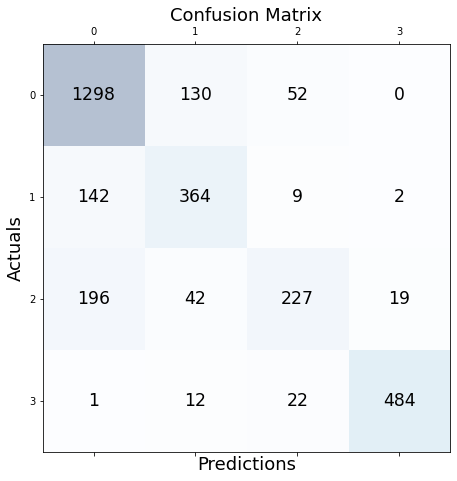

In [107]:
conf_matrix = matrix
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

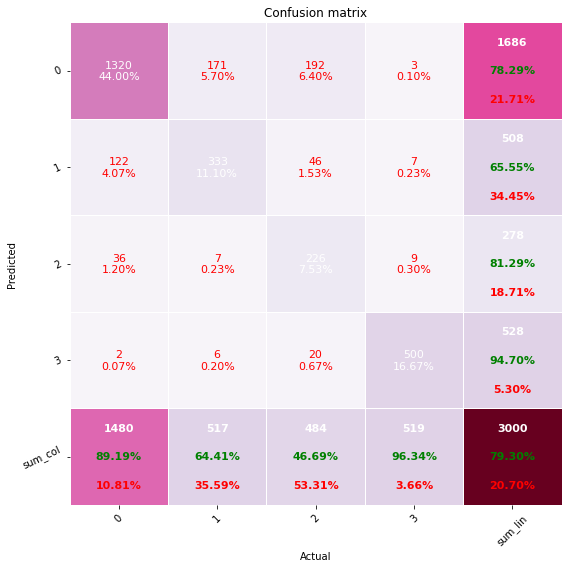

In [31]:
from pretty_confusion_matrix import pp_matrix

array = matrix

# get pandas dataframe
df_cm = pd.DataFrame(array, index=range(4), columns=range(4))
# colormap: see this and choose your more dear
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1480
           1       0.68      0.52      0.59       517
           2       0.76      0.43      0.55       484
           3       0.94      0.95      0.94       519

    accuracy                           0.77      3000
   macro avg       0.78      0.70      0.73      3000
weighted avg       0.77      0.77      0.76      3000



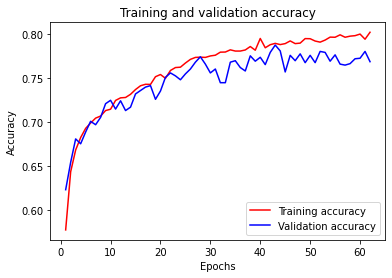

In [108]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [64]:
estimator = KerasClassifier(build_fn=model, epochs=200, batch_size=5, verbose=0)

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [65]:
kfold = KFold(n_splits=10, shuffle=True)

In [66]:
results = cross_val_score(estimator, X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

INFO:tensorflow:Assets written to: ram://4e4df93a-8e6e-418a-9c74-08866feb76e0/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://dde137c6-a0cb-401f-928b-adef469f68aa/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

### NN with scikit

In [83]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,30),random_state=1, max_iter=3000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:, :])
clf.score(X_test, y_test)

0.8063333333333333

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


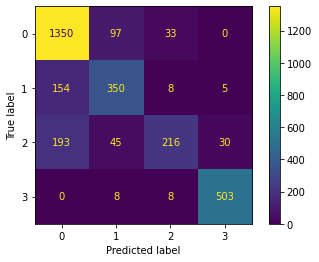

In [84]:
plot_confusion_matrix(clf, X_test, y_test)

In [89]:
clf_2c = MLPClassifier(hidden_layer_sizes=(100,30),random_state=1, max_iter=3000).fit(X_train_2c, y_train_2c)
clf_2c.predict_proba(X_test_2c[:1])
clf_2c.predict(X_test_2c[:, :])
clf_2c.score(X_test_2c, y_test_2c)

0.829

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


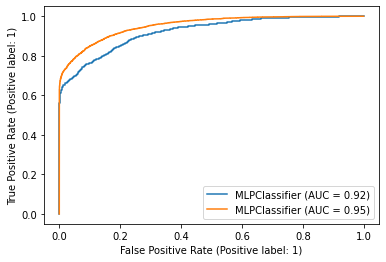

In [125]:
ax = plt.gca()
test_disp = plot_roc_curve(clf_2c,X_test_2c,y_test_2c,ax=ax)
train_disp = plot_roc_curve(clf_2c,X_train_2c,y_train_2c,ax=ax)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


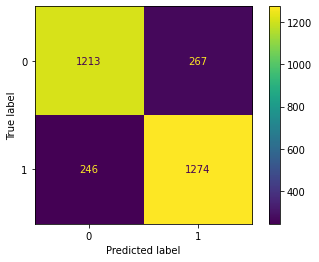

In [90]:
plot_confusion_matrix(clf_2c, X_test_2c, y_test_2c)